# Comparison the Singh et al. 2018

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import pandas as pd
import xarray as xr

from scipy import signal
from scipy import stats
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
sys.path.insert(1,'/home/disk/kalman2/mkb22/LMR_lite/')
import LMR_utils 

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/instrumental_assimilation_experiments/')
import reanalysis_recons_utils as rrutils

sys.path.insert(1,'/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/')
import commonera_utils as ce_utils 

Loading information from datasets.yml
Loading information from grid_def.yml
Loading information from datasets.yml
Loading information from grid_def.yml


In [3]:
plt.rcParams['figure.dpi']=200

In [26]:
anom_start = 1979
anom_end = 2000

### Load/preprocess reconstruction: 

In [21]:
output_dir_ccsm4 = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/ccsm4/'
#output_file_ccsm4 = 'sic_ccsm4_anrecon_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'
output_file_ccsm4 = 'sic_ccsm4_anrecon_revisions1_0_2000_pages2kv2_inf2_6_loc15000_iter0.pkl'

niter = 10

[sic_lalo_allit_ccsm4, tas_lalo_allit_ccsm4, sic_ens_var_allit_ccsm4, 
 nobs_allit_ccsm4, sia_ens_allit_ccsm4, sie_ens_allit_ccsm4, Ye_assim_allit_ccsm4, 
 Ye_assim_coords_allit_ccsm4, Xb_inflate_allit_ccsm4, recon_years, 
 proxy_assim_loc_allit_ccsm4] = ce_utils.load_recon_allit(output_dir_ccsm4,output_file_ccsm4,niter)

In [22]:
output_dir_mpi = '/home/disk/p/mkb22/nobackup/LMR_output/common_era_experiments/experiments/mpi/'
#output_file_mpi = 'sic_mpi_anrecon_0_2000_pages2kv2_inf1_8_loc15000_iter0.pkl'
output_file_mpi = 'sic_mpi_anrecon_revisions1_0_2000_pages2kv2_inf1_8_loc15000_iter0.pkl'

[sic_lalo_allit_mpi, tas_lalo_allit_mpi, sic_ens_var_allit_mpi, 
 nobs_allit_mpi, sia_ens_allit_mpi, sie_ens_allit_mpi, Ye_assim_allit_mpi, 
 Ye_assim_coords_allit_mpi, Xb_inflate_allit_mpi, recon_years, 
 proxy_assim_loc_allit_mpi] = ce_utils.load_recon_allit(output_dir_mpi,output_file_mpi,niter)

In [27]:
anom_ind = np.where((np.array(recon_years)<anom_end)&(np.array(recon_years)>=anom_start))

sia_ens_allit_2d_ccsm4 = np.reshape(sia_ens_allit_ccsm4,(sia_ens_allit_ccsm4.shape[0],
                                    sia_ens_allit_ccsm4.shape[1]*sia_ens_allit_ccsm4.shape[2]))
sia_ens_anom_allit_ccsm4 = sia_ens_allit_2d_ccsm4 - np.nanmean(np.squeeze(sia_ens_allit_2d_ccsm4[anom_ind,:]),axis=0)
sia_ensmn_anom_allit_ccsm4 = np.nanmean(sia_ens_anom_allit_ccsm4,axis=1)

sia_97_5_allit_ccsm4 = np.percentile(sia_ens_anom_allit_ccsm4,97.5,axis=1)
sia_2_5_allit_ccsm4 = np.percentile(sia_ens_anom_allit_ccsm4,2.5,axis=1)

In [28]:
sia_ens_allit_2d_mpi = np.reshape(sia_ens_allit_mpi,(sia_ens_allit_mpi.shape[0],
                                  sia_ens_allit_mpi.shape[1]*sia_ens_allit_mpi.shape[2]))
sia_ens_anom_allit_mpi = sia_ens_allit_2d_mpi - np.nanmean(np.squeeze(sia_ens_allit_2d_mpi[anom_ind,:]),axis=0)
sia_ensmn_anom_allit_mpi = np.nanmean(sia_ens_anom_allit_mpi,axis=1)

sia_97_5_allit_mpi = np.percentile(sia_ens_anom_allit_mpi,97.5,axis=1)
sia_2_5_allit_mpi = np.percentile(sia_ens_anom_allit_mpi,2.5,axis=1)

### Load Singh et al. 2018: 

In [4]:
singh_dir = '/home/disk/chaos/mkb22/Documents/SeaIceData/Singh_etal_2018/'
singh_filename = 'sic_mlost_ccsm4_AMOinLMR_0to2000.nc'

In [14]:
singh_ds = xr.open_dataset(singh_dir+singh_filename)

singh_sic = singh_ds.data_timeseries.values
singh_time = singh_ds.time.values
singh_lat = singh_ds.latitude.values
singh_lon = singh_ds.longitude.values

In [17]:
nharea = 2*np.pi*(6380**2)/1e8

_,nhm_singh_sic,_ = LMR_utils.global_hemispheric_means(singh_sic,singh_lat)

sia_singh = nhm_singh_sic*nharea

In [33]:
anom_ind = np.where((np.array(singh_time)<anom_end)&(np.array(singh_time)>=anom_start))

sia_singh_anom = sia_singh - np.nanmean(np.squeeze(sia_singh[anom_ind]),axis=0)

In [38]:
[ce_sia_ccsm4_singh,corr_sia_ccsm4_singh,
 var_sia_sat_ccsm4_singh,
 var_sia_recon_ccsm4_singh] = rrutils.find_ce_corr(sia_ensmn_anom_allit_ccsm4, 
                                                   sia_singh_anom,
                                                   singh_time,
                                                   np.array(recon_years),0,1999)

[ce_sia_mpi_singh,corr_sia_mpi_singh,
 var_sia_sat_mpi_singh,
 var_sia_recon_mpi_singh] = rrutils.find_ce_corr(sia_ensmn_anom_allit_mpi, 
                                                   sia_singh_anom,
                                                   singh_time,
                                                   np.array(recon_years),0,1999)

In [40]:
print("R^2: CCSM4 v Singh2018 = "+ str(np.round(corr_sia_ccsm4_singh**2,2)))
print("R^2: MPI   v Singh2018 = "+ str(np.round(corr_sia_mpi_singh**2,2))+'\n')

print("CE:  CCSM4 v Singh2018 = "+ str(np.round(ce_sia_ccsm4_singh,2)))
print("CE:  MPI   v Singh2018 = "+ str(np.round(ce_sia_mpi_singh,2))+'\n')

R^2: CCSM4 v Singh2018 = 0.44
R^2: MPI   v Singh2018 = 0.44

CE:  CCSM4 v Singh2018 = -5.91
CE:  MPI   v Singh2018 = -4.32



### Plotting: 

In [42]:
Wn2 = 1.0/20
nf2 = 7
b2,a2 = signal.butter(nf2,Wn2,btype='lowpass')
w2, h2 = signal.freqs(b2, a2)


sia_ensmn_anom_allit_mpi_filt20 = signal.filtfilt(b2,a2,sia_ensmn_anom_allit_mpi)
sia_ensmn_anom_allit_ccsm4_filt20 = signal.filtfilt(b2,a2,sia_ensmn_anom_allit_ccsm4)
sia_singh_anom_filt20 = signal.filtfilt(b2,a2,sia_singh_anom)

sia_ensmn_mpi_low_filt20 = signal.filtfilt(b2,a2,sia_2_5_allit_mpi)
sia_ensmn_mpi_high_filt20 = signal.filtfilt(b2,a2,sia_97_5_allit_mpi)

sia_ensmn_ccsm4_low_filt20 = signal.filtfilt(b2,a2,sia_2_5_allit_ccsm4)
sia_ensmn_ccsm4_high_filt20 = signal.filtfilt(b2,a2,sia_97_5_allit_ccsm4)

/home/disk/chaos/mkb22/anaconda2/envs/lmr_py3_xarray/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


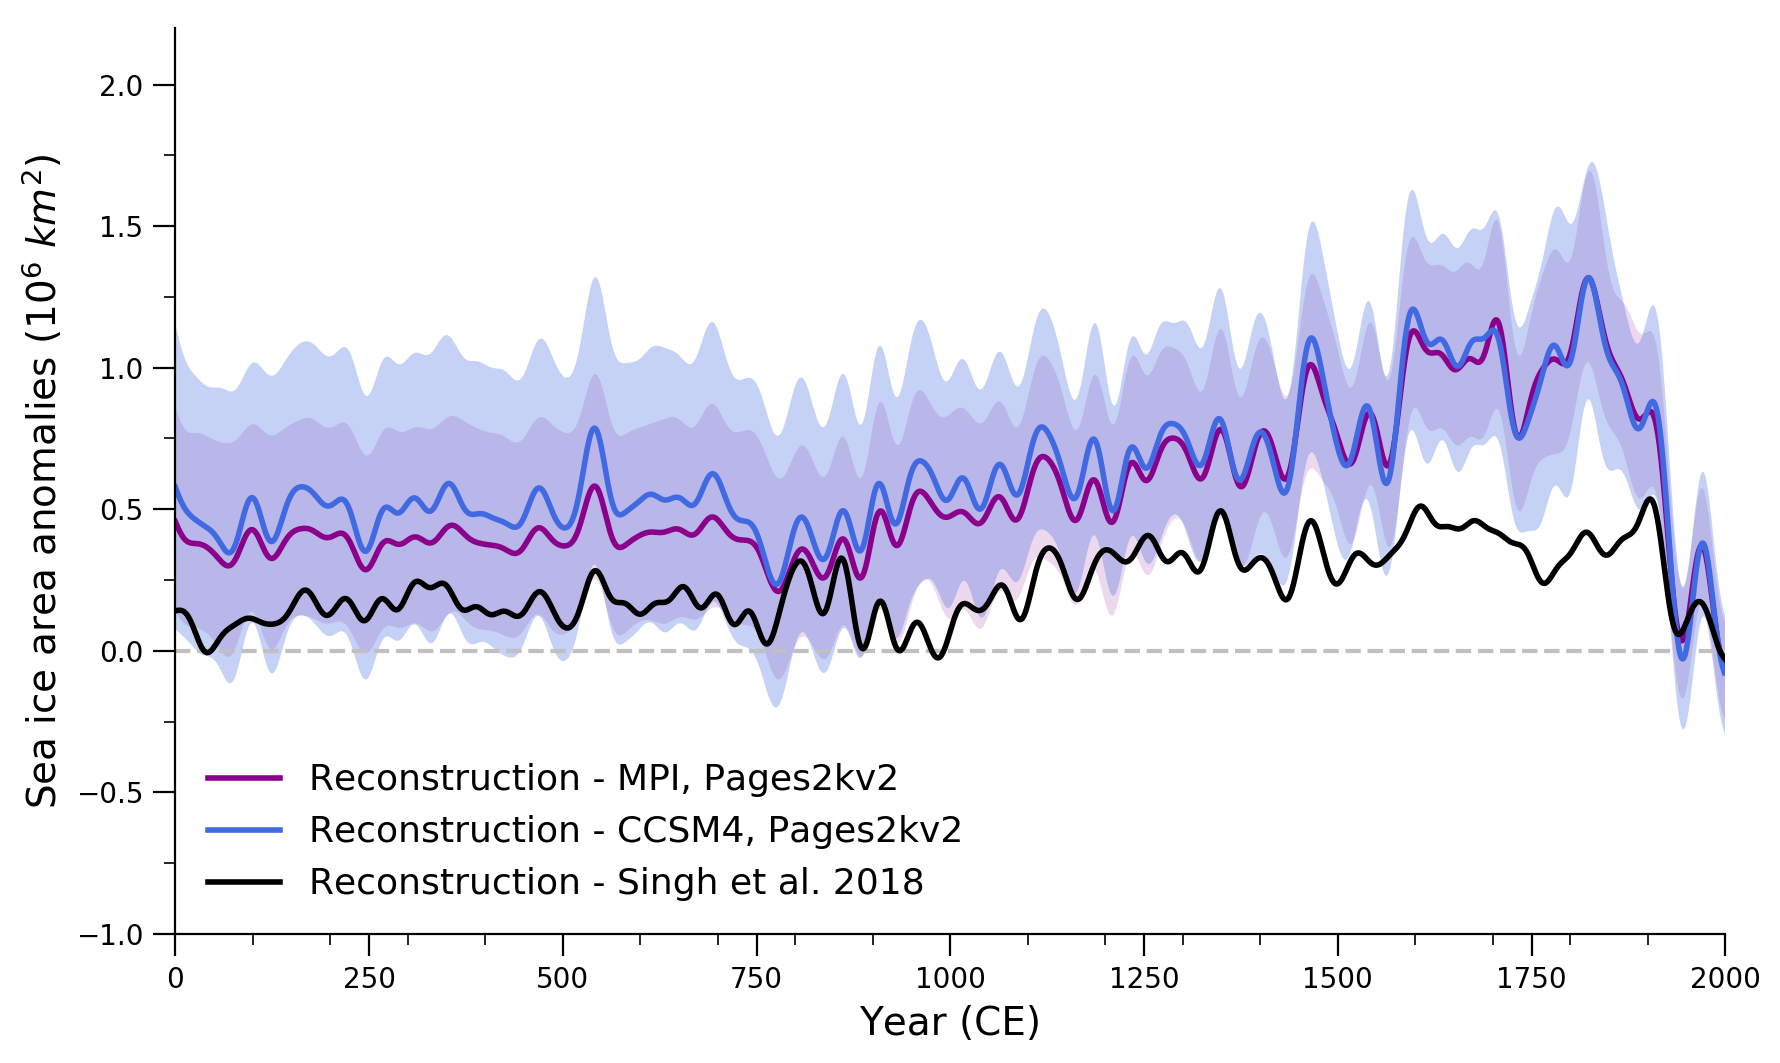

In [48]:
#plt.figure(figsize=(10,6))
fig,ax = plt.subplots(1,figsize=(10,6))
plt.axhline(0,linestyle='--',color='silver')

plt.fill_between(recon_years,sia_ensmn_mpi_low_filt20,sia_ensmn_mpi_high_filt20,
                 alpha=0.15, color='darkmagenta',linewidth=0.0)
plt.fill_between(recon_years,sia_ensmn_ccsm4_low_filt20,sia_ensmn_ccsm4_high_filt20,
                 alpha=0.3, color='royalblue',linewidth=0.01)

plt.plot(recon_years,sia_ensmn_anom_allit_mpi_filt20,color='darkmagenta',#'#8756e4',
         label='Reconstruction - MPI, Pages2kv2',linewidth=2)
plt.plot(recon_years,sia_ensmn_anom_allit_ccsm4_filt20,color='royalblue',#'#8756e4',
         label='Reconstruction - CCSM4, Pages2kv2',linewidth=2)
plt.plot(singh_time, sia_singh_anom_filt20,color='k',#'#8756e4',
         label='Reconstruction - Singh et al. 2018',linewidth=2)


plt.ylabel('Sea ice area anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=13,loc='lower left',frameon=False)

#plt.ylim(7,13.1,1)
# ce_corr_plt_ccsm4 = (('(Brennan et al. 2020, DA proxy recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_ccsm4**2))+
#                ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_ccsm4))
# ce_corr_plt_sat = (('(Satellite, DA proxy recon):                   R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_sat**2))+
#                ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_sat))

# plt.gcf().text(0.14, 0.14, ce_corr_plt_ccsm4 , fontsize=12,color='k')
# plt.gcf().text(0.14, 0.185, ce_corr_plt_sat , fontsize=12,color='k')

plt.xlim(0,2000)
plt.ylim(-1,2.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4)

# plt.axvline(1907,linestyle='--',color='silver')
# plt.axvline(1938,linestyle='--',color='silver')
# plt.axvline(1964,linestyle='--',color='silver')
# plt.axvline(1950,linestyle='--',color='silver')

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_mpi_v_sat_walshv2_brennan_ccsm4_10it_1850_2017.png'
#plt.savefig(savedir+savename)

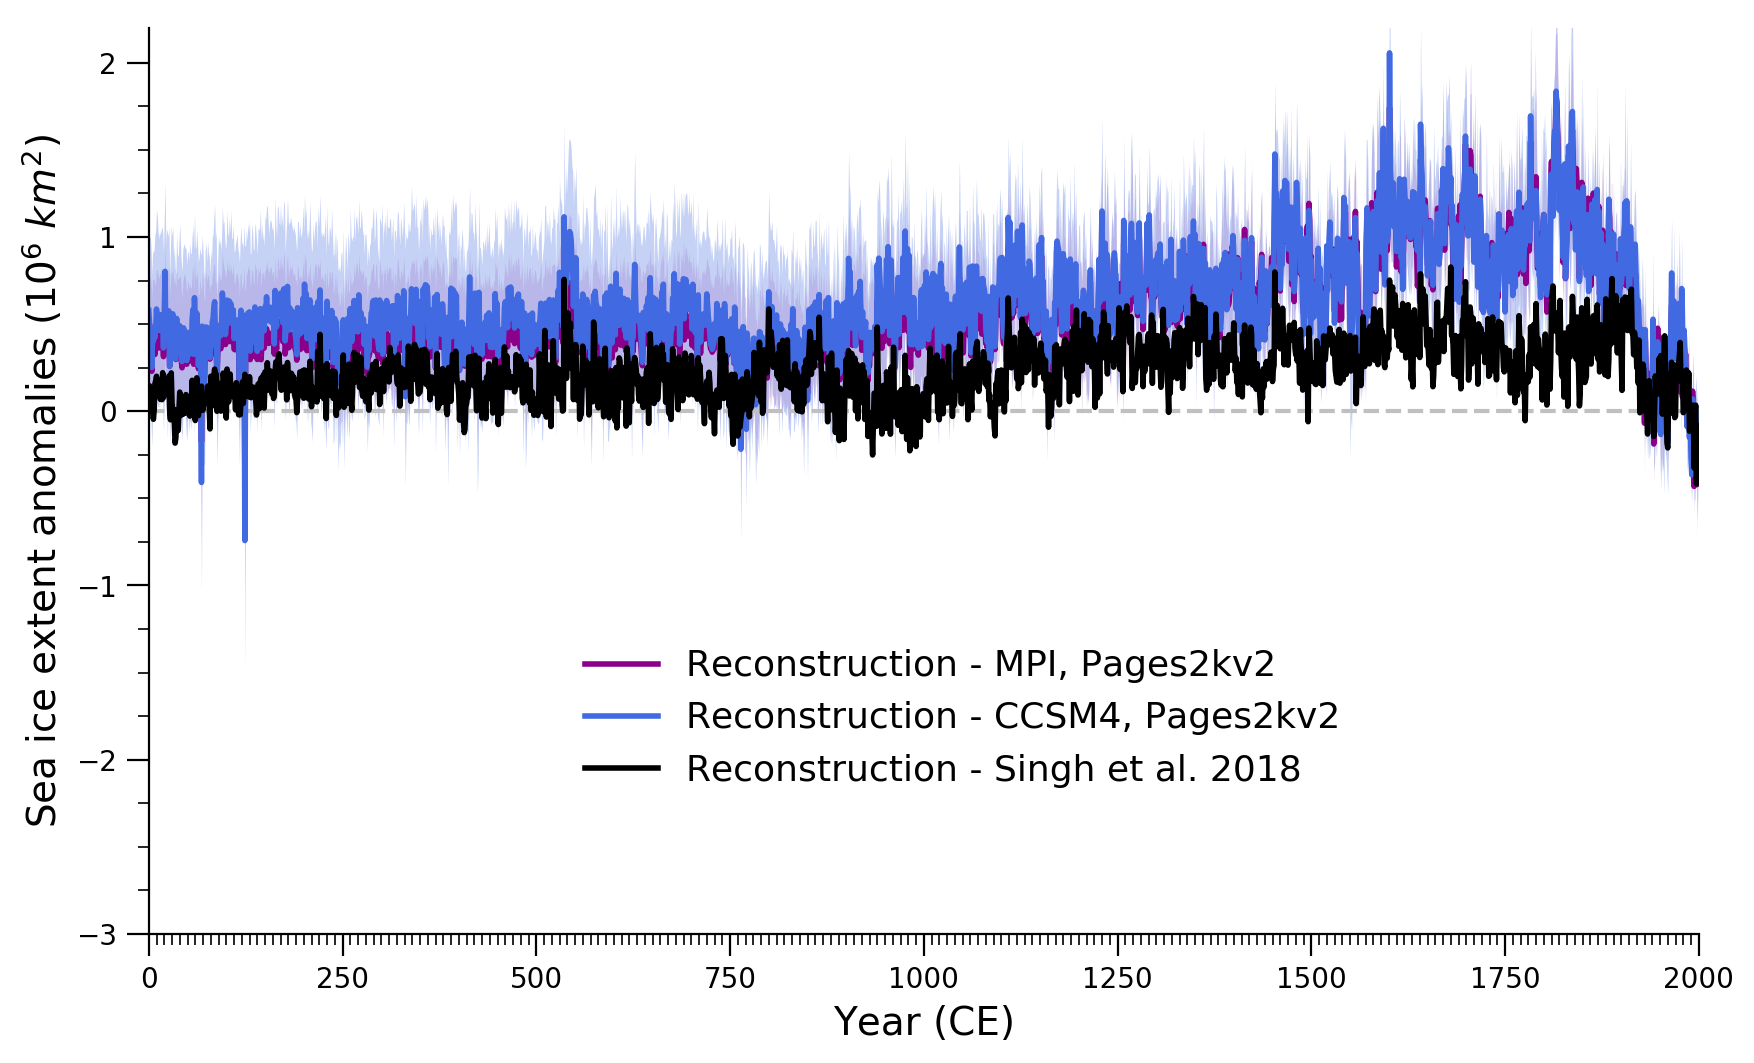

In [34]:
#plt.figure(figsize=(10,6))
fig,ax = plt.subplots(1,figsize=(10,6))
plt.axhline(0,linestyle='--',color='silver')

plt.fill_between(recon_years,sia_2_5_allit_mpi,sia_97_5_allit_mpi,
                 alpha=0.15, color='darkmagenta',linewidth=0.0)
plt.fill_between(recon_years,sia_2_5_allit_ccsm4,sia_97_5_allit_ccsm4,
                 alpha=0.3, color='royalblue',linewidth=0.01)

plt.plot(recon_years,sia_ensmn_anom_allit_mpi,color='darkmagenta',#'#8756e4',
         label='Reconstruction - MPI, Pages2kv2',linewidth=2)
plt.plot(recon_years,sia_ensmn_anom_allit_ccsm4,color='royalblue',#'#8756e4',
         label='Reconstruction - CCSM4, Pages2kv2',linewidth=2)
plt.plot(singh_time, sia_singh_anom,color='k',#'#8756e4',
         label='Reconstruction - Singh et al. 2018',linewidth=2)


plt.ylabel('Sea ice extent anomalies (10$^{6}$ $km^2$)',fontsize=14)
plt.xlabel('Year (CE)',fontsize=14)
#plt.title('Total Arctic Sea Ice Extent', fontsize=14)

plt.legend(fontsize=13,bbox_to_anchor=(0.79, 0.35),frameon=False)
#plt.ylim(7,13.1,1)
# ce_corr_plt_ccsm4 = (('(Brennan et al. 2020, DA proxy recon): R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_ccsm4**2))+
#                ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_ccsm4))
# ce_corr_plt_sat = (('(Satellite, DA proxy recon):                   R$^{2}$ = ' + '{:,.2f}'.format(corr_sie_ccsm4_sat**2))+
#                ', CE = '+'{:,.2f}'.format(ce_sie_ccsm4_sat))

# plt.gcf().text(0.14, 0.14, ce_corr_plt_ccsm4 , fontsize=12,color='k')
# plt.gcf().text(0.14, 0.185, ce_corr_plt_sat , fontsize=12,color='k')

plt.xlim(0,2000)
plt.ylim(-3,2.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_minor_locator(MultipleLocator(0.25))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4)

# plt.axvline(1907,linestyle='--',color='silver')
# plt.axvline(1938,linestyle='--',color='silver')
# plt.axvline(1964,linestyle='--',color='silver')
# plt.axvline(1950,linestyle='--',color='silver')

#print(ce_sie,corr_sie,var_sie_sat,var_sie_recon)

savedir = ('/home/disk/p/mkb22/Documents/si_analysis_kb/common_era_experiments/'+
           'analysis/figures/Brennan_Hakim_2020/')
savename = 'tot_sie_ccsm4_mpi_v_sat_walshv2_brennan_ccsm4_10it_1850_2017.png'
#plt.savefig(savedir+savename)